In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from bioinfokit.analys import stat

%matplotlib inline



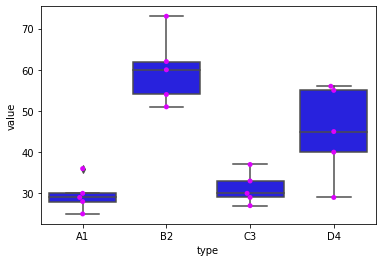

In [17]:
# load data file
df = pd.read_csv("../dataset/owanova.txt", sep = "\t")

# reshape wide to long for stats library
long_format_df = pd.melt(df.reset_index(), id_vars = ['index'], value_vars = ['A1', 'B2', 'C3', 'D4'])

# Column names
long_format_df.columns = ['index', 'type', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can
# easily detect the differences between different treatments

ax = sns.boxplot(x = 'type', y='value', data = long_format_df, color='#0b03fc')
ax = sns.swarmplot(x = "type", y="value", data = long_format_df, color='#db03fc')
plt.show()

In [9]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A1'], df['B2'], df['C3'], df['D4'])
print(fvalue, pvalue)

# get ANOVA table

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(type)', data = long_format_df).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

res = stat()
res.anova_stat(df = long_format_df, res_var = 'value', anova_model = 'value ~ C(type)')
res.anova_summary

17.492810457516338 2.639241146210922e-05


,df,sum_sq,mean_sq,F,PR(>F)
C(type),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [10]:
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(type),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN
